# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04c41275fea3e8291170fd88095dde0f"
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for x, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (x % 50 == 0 and x >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | fortuna foothills
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | half moon bay
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | nouadhibou
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | rugby
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | gourcy
Processing Record 22 of Set 1 | mataura
Processing Record 2

Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | sibolga
Processing Record 42 of Set 4 | casma
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | kamaishi
Processing Record 45 of Set 4 | omsukchan
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | wanning
Processing Record 49 of Set 4 | deputatskiy
Processing Record 0 of Set 5 | mkushi
Processing Record 1 of Set 5 | blagoyevo
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | cayenne
Processing Record 4 of Set 5 | kendallville
Processing Record 5 of Set 5 | guaiuba
Processing Record 6 of Set 5 | harper
Processing Record 7 of Set 5 | swan hill
Processing Record 8 of Set 5 | utiroa
City not found. Skipping...
Processing Record 9 of Set 5 | souillac
Processing Record 10 of Set 5 | bratsk
Processing Record 11 of Set 5 | sambava
Processing Record 12 of Set 5 | vestmannaeyjar
Process

Processing Record 26 of Set 8 | poum
Processing Record 27 of Set 8 | visimo-utkinsk
City not found. Skipping...
Processing Record 28 of Set 8 | yeniseysk
Processing Record 29 of Set 8 | vadodara
Processing Record 30 of Set 8 | dianopolis
City not found. Skipping...
Processing Record 31 of Set 8 | grande prairie
Processing Record 32 of Set 8 | pangnirtung
Processing Record 33 of Set 8 | ulaangom
Processing Record 34 of Set 8 | sarankhola
Processing Record 35 of Set 8 | sangar
Processing Record 36 of Set 8 | shenjiamen
Processing Record 37 of Set 8 | kimberley
Processing Record 38 of Set 8 | talnakh
Processing Record 39 of Set 8 | san lorenzo
Processing Record 40 of Set 8 | coahuayana
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | toora-khem
Processing Record 45 of Set 8 | iqaluit
Processing Record 46 of Set 8 | havoysund
Processing Record 47 of Set 8 | sweetwa

Processing Record 14 of Set 12 | sokolo
Processing Record 15 of Set 12 | athabasca
Processing Record 16 of Set 12 | xai-xai
Processing Record 17 of Set 12 | shimoda
Processing Record 18 of Set 12 | saint-honore
Processing Record 19 of Set 12 | zhuhai
Processing Record 20 of Set 12 | batagay
Processing Record 21 of Set 12 | khromtau
Processing Record 22 of Set 12 | mehamn
Processing Record 23 of Set 12 | zyryanovsk
Processing Record 24 of Set 12 | sabha
Processing Record 25 of Set 12 | verkhnetulomskiy
Processing Record 26 of Set 12 | tazovskiy
Processing Record 27 of Set 12 | vanavara
Processing Record 28 of Set 12 | skegness
Processing Record 29 of Set 12 | stoyba
City not found. Skipping...
Processing Record 30 of Set 12 | mrirt
City not found. Skipping...
Processing Record 31 of Set 12 | neiafu
Processing Record 32 of Set 12 | tulun
Processing Record 33 of Set 12 | nantucket
Processing Record 34 of Set 12 | broken hill
Processing Record 35 of Set 12 | nioro
Processing Record 36 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [26]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,75.20,64,40,18.34,AR,1607447877
1,bredasdorp,-34.53,20.04,68.00,77,16,14.99,ZA,1607448099
2,anadyr,64.75,177.48,3.20,91,40,4.47,RU,1607448099
3,fortuna foothills,32.66,-114.41,71.01,10,1,8.05,US,1607448099
4,padang,-0.95,100.35,77.83,79,100,3.85,ID,1607448099


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.0000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.819327,15.4614,52.576400,72.405455,51.672727,7.999400,1.607448e+09
std,34.116047,92.3897,30.164354,20.842570,37.962043,5.264536,1.106978e+02
min,-54.800000,-179.1700,-38.810000,10.000000,0.000000,0.200000,1.607447e+09
25%,-8.310000,-66.3225,32.252500,63.250000,11.000000,4.180000,1.607448e+09
50%,22.295000,18.3050,61.265000,78.000000,55.000000,6.930000,1.607448e+09
75%,49.397500,101.3525,77.097500,88.000000,90.000000,10.940000,1.607448e+09
max,78.220000,178.4200,97.750000,100.000000,100.000000,29.060000,1.607448e+09


In [28]:
#  Get the indices of cities that have humidity over 100%.

dirty_city = city_data_pd[(city_data_pd["Humidity"]>100)].index
dirty_city


Int64Index([], dtype='int64')

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_data = city_data_pd.drop(dirty_city, inplace = False)
clean_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,75.20,64,40,18.34,AR,1607447877
1,bredasdorp,-34.53,20.04,68.00,77,16,14.99,ZA,1607448099
2,anadyr,64.75,177.48,3.20,91,40,4.47,RU,1607448099
3,fortuna foothills,32.66,-114.41,71.01,10,1,8.05,US,1607448099
4,padang,-0.95,100.35,77.83,79,100,3.85,ID,1607448099


In [30]:
lats = clean_data["Lat"]
max_temps = clean_data["Max Temp"]
humidity = clean_data["Humidity"]
cloudiness = clean_data["Cloudiness"]
wind_speed = clean_data["Wind Speed"]
# Export the City_Data into a csv
clean_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

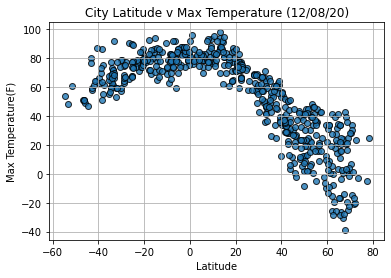

In [31]:
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude v Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)

plt.savefig("output_data/Fig1.png")
plt.show()

In [ ]:
This graph shows that maximum temperature increases as the latitude approaches 0.
Either way moving away from 0 the temperature decreases.

## Latitude vs. Humidity Plot

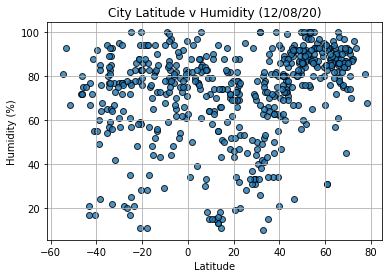

In [32]:
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude v Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/Fig2.png")
plt.show()

In [ ]:
This shows that humidity is a little less predicatable than temperature.

## Latitude vs. Cloudiness Plot

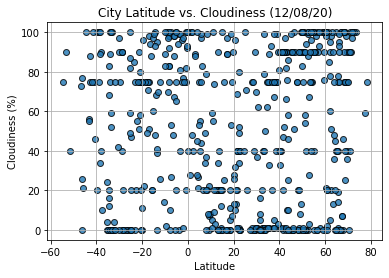

In [33]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/Fig3.png")
plt.show()

In [ ]:
Like humidity, cloudiness is not solely dependent on latitude.

## Latitude vs. Wind Speed Plot

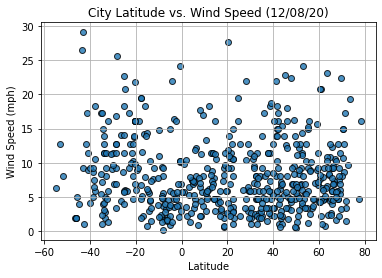

In [34]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("output_data/Fig4.png")
plt.show()

In [ ]:
Wind speed is not dependent on latitude and shows no relation.

## Linear Regression

In [35]:

# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] >= 0]
southern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] < 0]

In [36]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


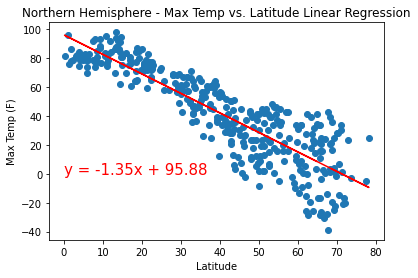

In [40]:
# Call a function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.64


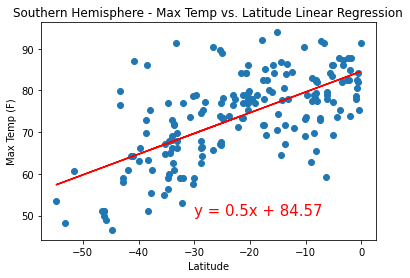

In [41]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call a function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.42


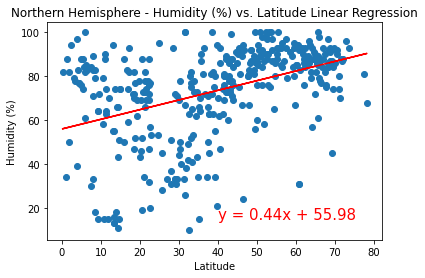

In [42]:
# Call a function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call a function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.13


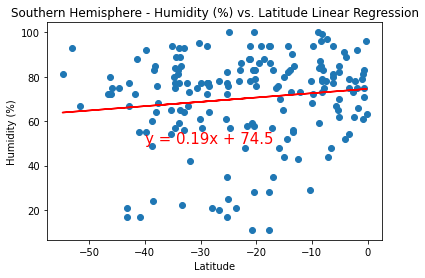

In [43]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call a function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.23


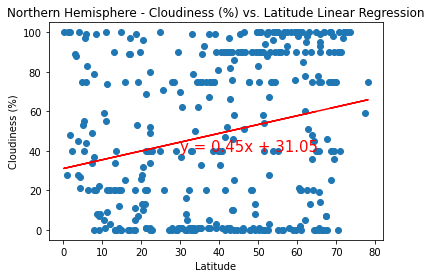

In [44]:
# Call a function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call a function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.19


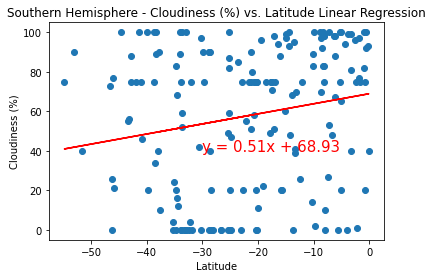

In [45]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call a function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09


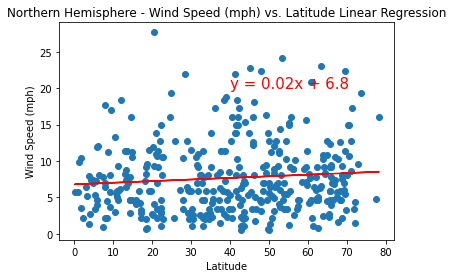

In [46]:
# Call a function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call a function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.16


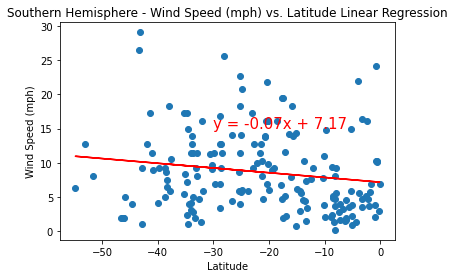

In [47]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call a function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")